In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, MultiPoint

def plot_geoms(geoms, colors=None, ax=None):
    '''几何可视化函数'''
    if not ax:
        fig, ax = plt.subplots()
    for i, geom in enumerate(geoms):
        if isinstance(geom, MultiPolygon):
            for poly in geom.geoms:
                if not poly.is_empty:
                    x, y = poly.exterior.xy
                    ax.fill(x, y, alpha=0.4, fc=colors[i] if colors else 'blue')
        if isinstance(geom, Polygon):
            x, y = geom.exterior.xy
            ax.fill(x, y, alpha=0.4, fc=colors[i] if colors else 'blue')
        elif isinstance(geom, LineString):
            x, y = geom.xy
            ax.plot(x, y, color=colors[i] if colors else 'red')
        elif isinstance(geom, Point):
            ax.scatter(geom.x, geom.y, color=colors[i] if colors else 'green')
    ax.set_aspect('equal')


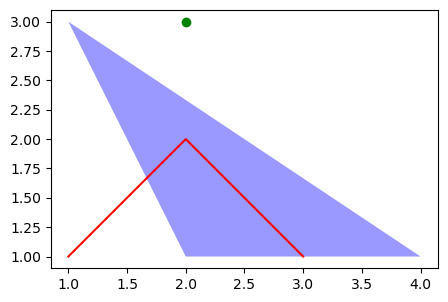

In [21]:
## 几何创建
from shapely.geometry import Point, LineString, Polygon
point = Point(2,3)
line = LineString([(1,1), (2,2), (3,1)])
poly1 = Polygon([(1,3), (2,1), (4,1)])
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_geoms(geoms=[point,line,poly1], colors=None, ax=ax)

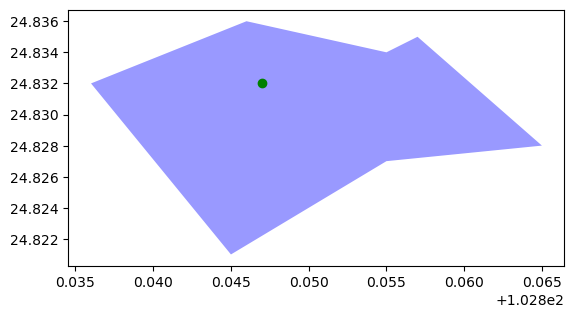

In [3]:
### 课堂练习
# 1. 创建云南大学呈贡校区几何面要素
# 2. 云南大学呈贡校区明远楼点几何要素
ynu_geo = Polygon([(102.836,24.832),(102.846,24.836),
                   (102.855,24.834),(102.857,24.835),
                   (102.865,24.828),(102.855,24.827),
                   (102.845,24.821)]) ## 创建面几何
mingyuan_geo = Point(102.847,24.832)
plot_geoms([ynu_geo, mingyuan_geo])


In [ ]:
# point.xy
# line.xy
# poly1.exterior.xy
# list(point.coords) 
# list(line.coords)
# list(poly1.exterior.coords)


[(1.0, 3.0), (2.0, 1.0), (4.0, 1.0), (1.0, 3.0)]

In [5]:
print(point.area)
print(line.length)
print(poly1.area)
print(poly1.bounds)


0.0
2.8284271247461903
2.0
(1.0, 1.0, 4.0, 3.0)


1.0


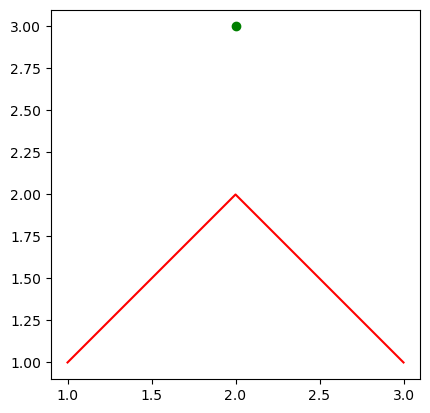

In [6]:
### 空间关系
r1 = point.within(poly1)
distance = point.distance(line)
print(distance)
# r2
plot_geoms(geoms=[point, line])


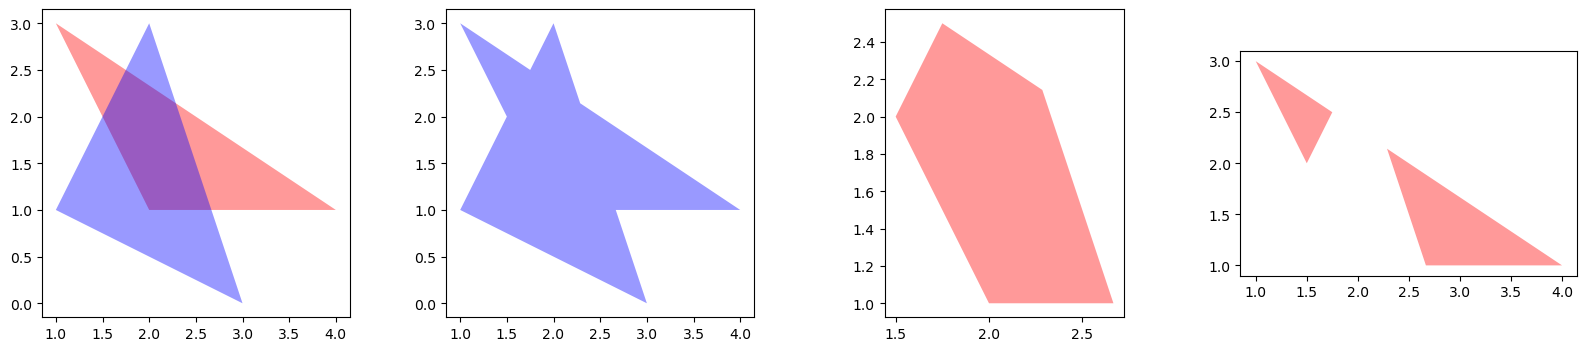

In [ ]:
## 几何空间处理：拓扑计算
poly1 = Polygon([(1,3), (2,1), (4,1)])
poly2 = Polygon([(1,1), (2,3), (3,0)])
union = poly1.union(poly2)
intersection = poly1.intersection(poly2)
diff = poly1.difference(poly2)

fig, ax = plt.subplots(1,4,figsize=(20,4))
plot_geoms(geoms=[poly1, poly2], colors=['red', 'blue'],ax=ax[0])
plot_geoms(geoms=[union], colors=['blue'],ax=ax[1])
plot_geoms(geoms=[intersection], colors=['red'],ax=ax[2])
plot_geoms(geoms=[diff], colors=['red'],ax=ax[3])



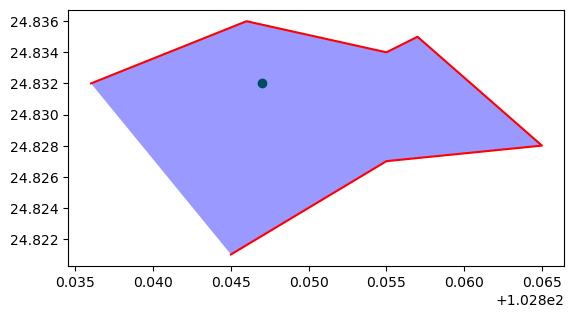

In [8]:
### 几何坐标系转换
from pyproj import Transformer
from shapely.ops import transform

point_wgs84 = Point(102.847,24.832)
ynu_line_wgs84 = LineString([(102.836,24.832),(102.846,24.836),
                   (102.855,24.834),(102.857,24.835),
                   (102.865,24.828),(102.855,24.827),
                   (102.845,24.821)]) ## 创建
ynu_poly_wgs84 = Polygon([(102.836,24.832),(102.846,24.836),
                   (102.855,24.834),(102.857,24.835),
                   (102.865,24.828),(102.855,24.827),
                   (102.845,24.821)]) ## 创建面几何

plot_geoms([point_wgs84, ynu_line_wgs84, ynu_poly_wgs84], ['green', 'red', 'blue'])


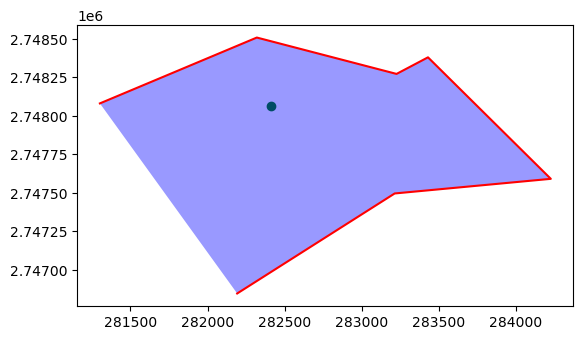

In [12]:
crs_src = 'EPSG:4326'
crs_dst = 'EPSG:32648'

transformer = Transformer.from_crs(crs_from=crs_src, crs_to=crs_dst, always_xy=True)
point_utm48 = transformer.transform(point_wgs84.x, point_wgs84.y)
point_utm48 = Point(point_utm48)

ynu_line_utm48 = transform(transformer.transform, ynu_line_wgs84)
ynu_poly_utm48 = transform(transformer.transform, ynu_poly_wgs84)
plot_geoms([point_utm48, ynu_line_utm48, ynu_poly_utm48], ['green', 'red', 'blue'])



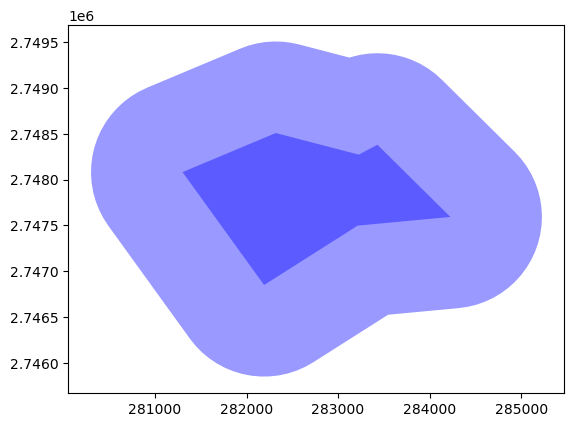

In [39]:
## 缓冲区分析
# point_buffer = point_utm48.buffer(1000)   ## 1000米缓冲区
# point_buffer_ = point_utm48.buffer(2000)   ## 1000米缓冲区
# line_buffer = ynu_line_utm48.buffer(1000)   
polygon_buffer = ynu_poly_utm48.buffer(1000) 

# # 可视化
# plot_geoms(geoms=[point_utm48, point_buffer, point_buffer_])
# plot_geoms(geoms=[ynu_line_utm48, line_buffer])
plot_geoms(geoms=[ynu_poly_utm48, polygon_buffer])
